At position  1  string of length  20  found previously at position  0
At position  2  string of length  19  found previously at position  0
At position  3  string of length  18  found previously at position  0
At position  4  string of length  17  found previously at position  0
At position  5  string of length  16  found previously at position  0
At position  6  string of length  15  found previously at position  0
At position  7  string of length  14  found previously at position  0
At position  8  string of length  13  found previously at position  0
At position  9  string of length  12  found previously at position  0
At position  10  string of length  11  found previously at position  0
At position  11  string of length  10  found previously at position  0
At position  12  string of length  9  found previously at position  0
At position  13  string of length  8  found previously at position  0
At position  14  string of length  7  found previously at position  0
At position  15  s

No handles with labels found to put in legend.


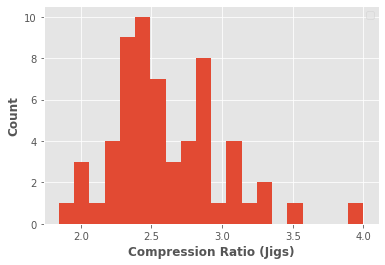

In [1]:
import sys
import string
import simplejson
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
lenR = 128
lenJ = 96
lenT = 96
#lenT = 128
def Rmatch(s,i,j):
    #search string s for substring BEGINNING
    #at position i, of length j
    #if (i+j+1 > len(s)):
    #    return([0,0])
    #else:
    return(s[:i+j-1].find(s[i:i+j]))

def Nmatch(s,i):
    j = 1
    ans = -1
    old = -1
    new = Rmatch(s,i,j)
    while ((new != -1) and (i+j-1 < len(s))):
        old = new
        j = j + 1
        new = Rmatch(s,i,j)
    return([old,j-1])

t = 'gfgegedBGAGEDGGFGABGBAAdgfgagedBGAGEDGGFGABGGGGdeddgddeddgddeeegfgedBAAdgfgagedBGAGEDGGFGABGGGGG'
s = 'GGGGGGGGGGGGGGGGGGGGGKGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG'
for i in range(len(s))[1:]:
    temp = Nmatch(s,i)
    print('At position ', i,' string of length ',temp[1],' found previously at position ',temp[0])
    
    

def Smatch(s,i): # i is an index (in L)
    print('Search block beginning at position ', i)
    temp = s[i]
    j = i
    pos = s[:j].find(temp)
    if (pos != -1):
        print('letter', temp,' found at position ', pos)
    while ((pos > -1) and (i < len(s) -1)):
        i = i + 1
        temp = temp + s[i]
        print('looking for ', temp,' in ',s[:j])
        pos = s[:j].find(temp)
        print(temp,' found at position ',pos)
    if (len(temp) > 1):
        #return([s[:j].find(temp[:-1]),len(temp)-1])
        if (i == len(s) -1):
            return([pos,len(temp)])
        else:
            return([s[:j].find(temp[:-1]),len(temp)-1])
    else:
        return([pos, len(temp)])

def StringM(letters):
    str2 = letters.translate({ord(d): None for d in string.whitespace})
    print(str2)
    ring = str2
    j=1
    new = [ring[0]]
    newA = [ring[0]]
    while (j < len(ring)):
        temp = Nmatch(ring,j)
        if (temp[0] == -1):
            new = new + [ring[j]]
            newA = newA + [ring[j]]
            j = j+1
        else:
            if (temp[1]<2):
                #don't bother indexing
                new = new + [ring[j:j+temp[1]]]
                newA = newA + [ring[temp[0]:(temp[0]+temp[1])]]
            else:
                new = new + [temp]
                newA = newA + [ring[temp[0]:(temp[0]+temp[1])]]
            j = j + temp[1]
    print(new)
    print(newA)
    print(ring)
    return([new,newA,ring])

def process(sent1):
    str2 = sent1.translate({ord(c): None for c in string.whitespace})
    print(str2)
    str3 = str2.replace("|","")
    #print(str3)
    str3a = str3.replace(":","")
    str3b = str3a.replace("^","")
    str4 = str3b.replace("~","")
    #print(str4)
    u = 1
    v = len(str4)-1
    while ((str4.find('(3',u,v)) != -1):
        #print("u= ",u," v= ",v)
        w = str4.find('(3',u,v)
        #print(w)
        #temp = str4[w+2]+str4[w+4]
        str4 = str4[:w] + str4[w+2] + str4[w+4:]
        #str4 = str4.replace("(3",temp,1)
        #print(str4)
        #print("found 2 at position ",w)
        u = w + 1
    u = 1
    v = len(str4)-1
    while ((str4.find('2',u,v)) != -1):
        #print("u= ",u," v= ",v)
        w = str4.find('2',u,v)
        #print(w)
        str4 = str4.replace("2",str4[w-1],1)
        #print(str4)
        #print("found 2 at position ",w)
        u = w + 1
    u = 1
    v = len(str4)-1
    while ((str4.find('4',u,v)) != -1):
        #print("u= ",u," v= ",v)
        w = str4.find('4',u,v)
        #print(w)
        temp = 3*str4[w-1]
        #print(temp)
        str4 = str4.replace("4",temp,1)
        #print(str4)
        #print("found 4 at position ",w)
        u = w + 1
    u = 1
    v = len(str4)-1
    while ((str4.find('3',u,v)) != -1):
        #print("u= ",u," v= ",v)
        w = str4.find('3',u,v)
        #print(w)
        temp = 2*str4[w-1]
        #print(temp)
        str4 = str4.replace("3",temp,1)
        #print(str4)
        #print("found 3 at position ",w)
        u = w + 1
    print(str4[-1])
    if (str4[-1] == '2'):
        str4 = str4[:-1] + str4[-2]
    if (str4[-1] == '4'):
        str4 = str4[:-1] + 3*str4[-2]
    if (str4[-1] == '3'):
        str4 = str4[:-1] + 2*str4[-2]
    return(str4)
    
fp = open("jigs.txt")
fo = open("jigOutput.txt", "w")
#f.write("Now the file has more content!")
#f.close()
ind = []
for i, line in enumerate(fp):
    if line[0] == 'T':
        print(line)
        # 26th line
    elif line[0] == 'K':
        ind = ind + [i]
fp.close()
print(ind)
tune = []
for k in ind:
    tune = tune + [k+1] + [k+2] + [k+3] + [k+4]
print(tune)

fp = open("jigs.txt")
ostats = []
stats = []
ratio = []
C = 0
str = ""
titles = []
for i, line in enumerate(fp):
    if line[0] == 'T':
        fo.write(line[2:])
        titles = titles + [line[2:]]
    if i in tune:
        C = C+1
        str = str + line[:-1]
        if (C == 4):
            print(str)
            fo.write(str+"\n")
            ab = process(str)
            print(ab)
            fo.write(ab+"\n")
            cd = StringM(ab)
            print(cd)
            #fo.writelines(cd[0])
            #fo.writelines(cd[1])
            #fo.writelines(cd[1]+"\n")
            fo.write(' '.join(cd[1])+"\n")
            lcd0 = len(cd[0])
            lcd1 = len(cd[1])
            lcd2 = len(cd[2])
            for k in range(lcd0):
                fo.write("%s," % cd[0][k])
            #fo.write(' '.join(cd[0])+"\n")
            #for x in cd[1]:
            #    print(x,file=fo)
            #fo.write('%03d\n' % len(cd[0]))
            fo.write('\n%03d***' % lcd1)
            fo.write('%03d\n' % lcd2)
            if lcd2 == lenT:
                stats = stats + [lcd1]
                ostats = ostats + [lcd2]
                ratio = ratio + [round(lenT/lcd1,3)]
            #fo.write(str(len(cd[0]))+"\t"+str(len(cd[1]))+"\t"+str(len(cd[2])))
            print(len(cd[0]),len(cd[1]),len(cd[2]))
            fo.write("\n"+"\n")
            C=0
            str=""
print(stats)
print(round(statistics.mean(stats),3))
print(round(statistics.pstdev(stats),3))
print(ratio)
print(round(statistics.mean(ratio),3))
print(round(statistics.pstdev(ratio),3))
fo.write("%s,\n" % ostats)
fo.write("%s,\n" % stats)
fo.write("-------------------------------------------------------\n")
fo.write("%s,\t"% len(stats))
fo.write("%s,\t"% len(ostats))
fo.write("%s,\n"% len(titles))
fo.write("-------------------------------------------------------\n")
fo.write("%s,\n"% statistics.mean(stats))
fo.write("-------------------------------------------------------\n")
fo.write("%s,\n"% statistics.pstdev(stats))
fo.write("-------------------------------------------------------\n")
fo.write("%s,\n" % ratio)
fo.write("%s,\t\n"% len(ratio))
fo.write("%s,\n"% statistics.mean(ratio))
fo.write("%s,\n"% statistics.pstdev(ratio))
fo.write("-------------------------------------------------------\n")
fp.close()
fo.close()
plt.legend()
plt.xlabel('Compression Ratio (Jigs)', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.hist(ratio, bins=20)
plt.savefig('histJ.jpg')
    
#for i, line in enumerate(fp):
#    print(enumerate(fp)[4])
#    if i in ind:
#        str=""
#        print(line)
#        # 26th line
#    elif line[0] == 'K':
#        ind = ind + [i]
#fp.close()

#file = open('test3.txt', 'r', encoding='utf-8')
#str1 = file.read()
#file.close()
#print(str1)
#str2 = process(str1)


    


